# Cloropleth Mapping

## Introduction

PySAL was initially created for computational spatial data analysis and spatial econometrics and not visualization, but some basic visualization is possible with the library. 

This tutorial will cover how to use PySAL and some other packages to create publishable cloropleth maps. The packages covered will include:

* geopandas
* folium
* cartopy
* bokeh

### PySAL Viz Module

The PySAL mapping module has three levels:
    
* __Lower-level__: reads point, line, polygon shapefiles and returns Matplotlib collection
* __Medium-level__: performs transformations on a Matplotlib object (e.g. color-code polygons according to values)
* __High-level__: end result for users, style preferences predefined (e.g. finished cloropleth map)


In [1]:
%matplotlib inline
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
from pylab import *

## Lower-level

This level has basic funcitonality to read spatial data from a file (ONLY SHAPEFILES SUPPORTED) and produce a rudimentary Matplotlib object. The main methods are:

* map_poly_shape: to read in polygon shapefiles
* map_line_shape: to read in line shapefiles
* map_point_shape: to read in point shapefiles

These methods have the ability to be plotted when data is missing. They can also be overlaid and combined using `setup_ax`. The resulting object is basic, but flexible. Matplotlib allows us to modify almost any property and attribute:

### Example using `map_poly_shape`:

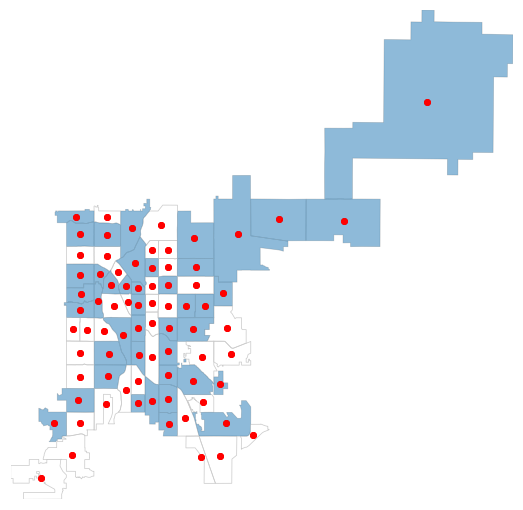

In [7]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
shp = ps.open(shp_path)
some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_path)]

fig = figure(figsize=(9,9))

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.5)
some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_path)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, some, pts], [shp.bbox, shp.bbox, shp.bbox])
fig.add_axes(ax)
show()

maps.map_poly_shp(shp)

### Example using `map_point_shape`:

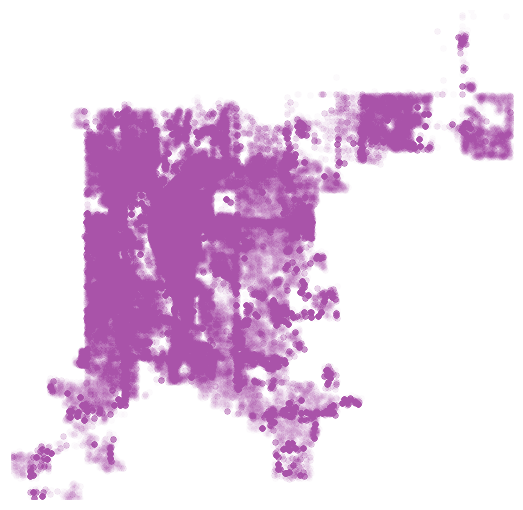

In [41]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Crime.shp'
pnt = ps.open(shp_path)

fig = figure(figsize=(9,9))

base = maps.map_point_shp(pnt)
base.set_color('purple')
base.set_alpha(0.01)

ax = maps.setup_ax([base], [pnt.bbox, pnt.bbox, pnt.bbox])
fig.add_axes(ax)
show()

#### Notes:

* `set_facecolor()` - sets the color of the polygon fill. `'none'` is no polygon fill.
* `set_linewidth()` - sets the width of the poygon line/outline. `0` is no line.
* `set_alpha()` - sets the transparency level of a layer
* `set_color()` - sets the color for fill or point

## Medium-level

This level has functions that perform transformations on matplotlib objects, such as color coding features (pnt, line, poly) acording to these three methods:

* `base_choropleth_classless`
* `base_choropleth_unique`
* `base_choropleth_classif`

### Example using `base_choropleth_unique` with `map_poly_shape`:

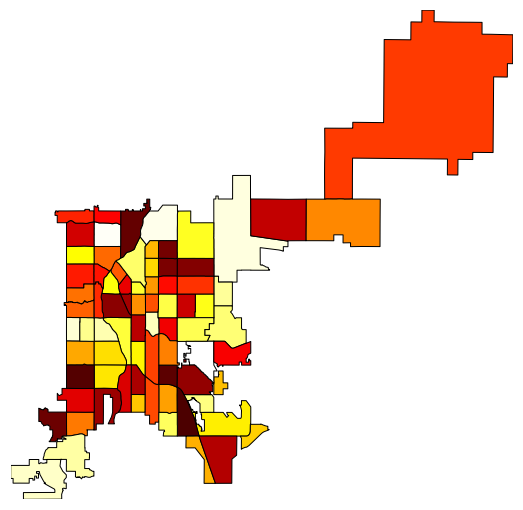

In [53]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
poly = ps.open(shp_path)
values = np.array(ps.open(shp_path.replace('.shp', '.dbf')).by_col('POPULATION'))

fig = figure(figsize=(9,9))

poly_m = maps.map_poly_shp(poly)
poly_c = maps.base_choropleth_unique(poly_m, values)

ax = maps.setup_ax([poly_c], [poly.bbox, poly.bbox])
fig.add_axes(ax)
show()

## High-level

Includes end-user formats that look nice. The primary function is `plot_poly_lines`.



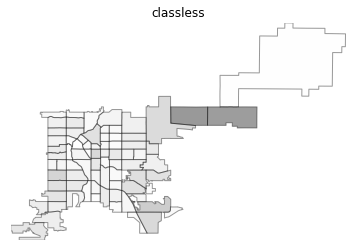

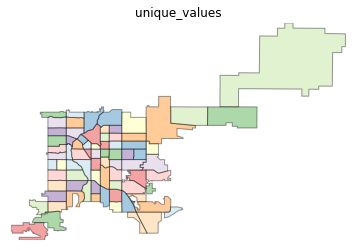

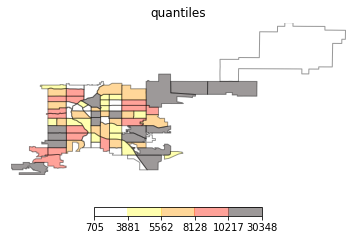

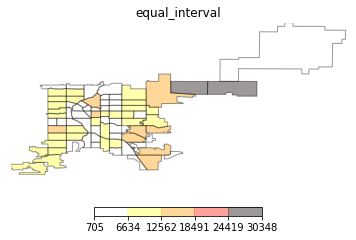

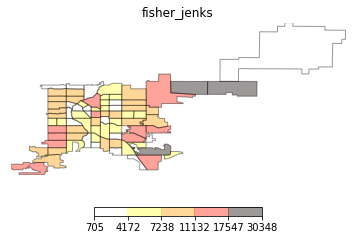

In [55]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
dbf_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.dbf'
values = np.array(ps.open(dbf_path).by_col('POPULATION'))

types = ['classless', 'unique_values', 'quantiles', 'equal_interval', 'fisher_jenks']
for typ in types:
    maps.plot_choropleth(shp_path, values, typ, title=typ)